In [18]:
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys
import pandas as pd

In [137]:
import sympy
from sympy import parse_expr as pe
from sympy.plotting import plot

In [51]:
def CreateDFWithAttBasedOnObjs(listOfObjects, attributesToSave):
    """Creates a dataframe by extracting the attributes from the objects in the list of objects"""
    df = pd.DataFrame()
    if type(listOfObjects[0]) == dict:
        for a in attributesToSave:
            r=[t[a] for t in listOfObjects]
            df[a]=r
    else:
        for a in attributesToSave:
            df[a]=[getattr(t,a) for t in listOfObjects]
    return df  

In [52]:
os.getcwd()

'C:\\Users\\garla\\git\\torch_tutorials_to_shared\\scratch\\evaluate_MLP'

In [53]:
# ! pwd()
p = Path('results')

In [54]:
files = list(p.glob("*.json"))

In [55]:
len(files)

1096

In [56]:
def read_json_file(file):
    with open(file, 'r') as f:
        return json.loads(f.read())

In [57]:
read_json_file(files[0])

{'fn_loss': 0.00507177272811532,
 'dydx_loss': 154.6720428466797,
 'd2yd2x_loss': 320.7490539550781,
 'fn': '(x**1.42488621167199 - 0.0625852585048804)/((x + 0.387811371643577)*(x + 0.475682368513832) - 0.2415706263371)'}

In [58]:
rdict =[read_json_file(f) for f in files]

In [62]:
df = CreateDFWithAttBasedOnObjs(rdict, ['fn_loss', 'dydx_loss', 'd2yd2x_loss', 'fn'])

In [63]:
# %debug

In [64]:
# 
# losses = [a['fn_loss'] for a in rdict]

In [65]:
# losses

In [66]:
df

,fn_loss,dydx_loss,d2yd2x_loss,fn
0,5.071773e-03,154.672043,320.749054,(x**1.42488621167199 - 0.0625852585048804)/((x...
1,1.647076e-05,0.000959,0.494649,x**0.307812621172029*sin(x)
2,2.045516e-06,0.000001,0.000176,sin(x)/x
3,6.568385e-03,263.614380,422.972229,1/(x**0.44276832838742*(x - 0.494711021624766))
4,1.704991e-03,93.926331,137.703079,1/(x**0.313496378241422*cos(x))
...,...,...,...,...
1091,1.191103e-03,109.360779,157.196793,(x**0.453875670540641 + 0.271869764935865)/(x*...
1092,3.677084e-03,125.987625,500.583099,(x*sin(x))**0.20969892478621/(x**1.27052589984...
1093,2.967743e-03,265.920471,532.616272,(x**(-0.251643617891415) - 0.0531673659151636)...
1094,1.658254e-07,NaN,0.000084,x


array([[<AxesSubplot:title={'center':'fn_loss'}>]], dtype=object)

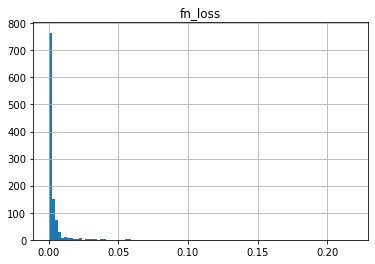

In [68]:
df.hist(column = 'fn_loss', bins = 100)

In [70]:
df2 = df.drop(columns = ['fn'])

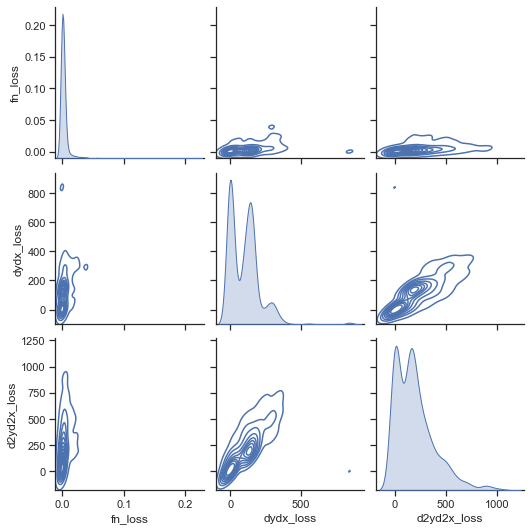

In [74]:
import seaborn as sns
sns.set_theme(style="ticks")

# df = sns.load_dataset("penguins")
sns.pairplot(df2,  kind="kde")

In [75]:
df.columns

Index(['fn_loss', 'dydx_loss', 'd2yd2x_loss', 'fn'], dtype='object')

In [110]:
df.dtypes

fn_loss        float64
dydx_loss      float64
d2yd2x_loss    float64
fn              object
dtype: object

In [132]:
df2 = df.dropna()

In [150]:
eval_column = 'fn_loss'
# eval_column = 'dydx_loss'
# eval_column = 'd2yd2x_loss'

# if eval_column == 'dydx_loss':
df2 = df2[df2['fn']!='x']
cut_value = np.percentile(df2[eval_column], 95)
cut_value

0.015997951943427312

In [151]:
df3 = df2[df2[eval_column]>cut_value]
print(df3.shape)
df3.head()

(54, 4)


,fn_loss,dydx_loss,d2yd2x_loss,fn
16,0.033023,150.050232,294.142212,x**0.670514222876747/((x - 0.376015008796818)*...
25,0.072211,347.562744,761.338928,x*(x - 0.236376475239205)*cos(x)/((x - 0.37751...
63,0.055350,106.092552,333.381958,((x + 0.321533663821126)**(-0.210841645036728)...
81,0.040517,267.103607,491.741760,(x - 0.181858978683201)/(x**0.984295842915821*...
115,0.022889,292.972748,498.780579,sin(x)*cos(x)/((x - 0.315621678657199)*(x - 0....


In [152]:
# df3['fn'].tolist()

In [153]:
worst_fns = [pe(f) for f in df3['fn']]

In [154]:
# worst_fns

<string>:1: RuntimeWarning: invalid value encountered in double_scalars
<string>:1: RuntimeWarning: invalid value encountered in double_scalars
<string>:1: RuntimeWarning: invalid value encountered in double_scalars
<string>:1: RuntimeWarning: invalid value encountered in double_scalars
<string>:1: RuntimeWarning: invalid value encountered in double_scalars
<string>:1: RuntimeWarning: invalid value encountered in double_scalars
<string>:1: RuntimeWarning: invalid value encountered in cdouble_scalars
<string>:1: RuntimeWarning: invalid value encountered in double_scalars
<string>:1: RuntimeWarning: invalid value encountered in double_scalars
<string>:1: RuntimeWarning: invalid value encountered in cdouble_scalars


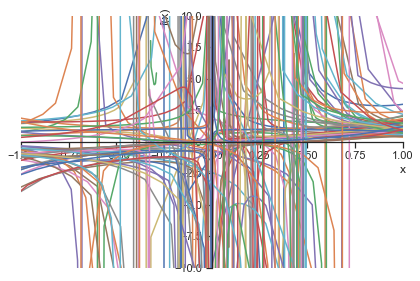

In [155]:
for i,fn in enumerate(worst_fns):
    if i ==0:
        p1 = plot(fn, show = False, ylim = [-10,10], xlim = [-1,1])
    else:
        p2 = plot(fn, show = False)
        p1.append(p2[0])
        
p1.show()